### **Please read carefully. Ask questions if you are unsure.**



We use an auto-grader to check your work. If you invent new notation (such as, new variable names) for yourself, you will mess up the auto-grader and receive no points. We will NOT do manual regrades because of failure to use the requested variable names.



Do not reinitialize variables and data provided for you. Please just run the cells when information is initialized for you. DO NOT RETYPE IT unless it is in a static cell (a cell that has no run button).



Not all tests are visible to you. Just because you have passed a test, doesn’t mean you will get full credit. Take some time to understand what it is your code is doing and what should output so you can check your answers before submission.





---



In [2]:
using Plots, LaTeXStrings, LinearAlgebra, Random
gr()
default(
    titlefont = (16, "times"), 
    legendfontsize = 12, 
    guidefont = (14), # Changes x and y axis label fonts
    linewidth = 2)

: 

Introduction
------------



In Project 2, we will explore a special nonlinear basis called the **radial basis functions** and see how these functions can be used to better fit a surface to a set of points. If you have heard of Machine Learning, a popular form of AI, then you'll be happy to know that radial basis functions are very common in Supervised Machine Learning!





---



### Task 1: Fitting with Radial Basis Functions



To build up intuition for some of the properties of the radial basis function, let's first explore trying to fit a curve to "noisy" measurements corresponding to a real-valued function. We will generate realistic measurements by selecting points on the x-axis and adding "noise" (that is, random numbers) to the corresponding output value of the function. If this is abstract, you can think of the y-values of the function as temperature values, the x-values as the measurement time and the noise as the measurement error that is inherent to our specific sensor.



In the console type `?randn` to find out more about the noise being added.



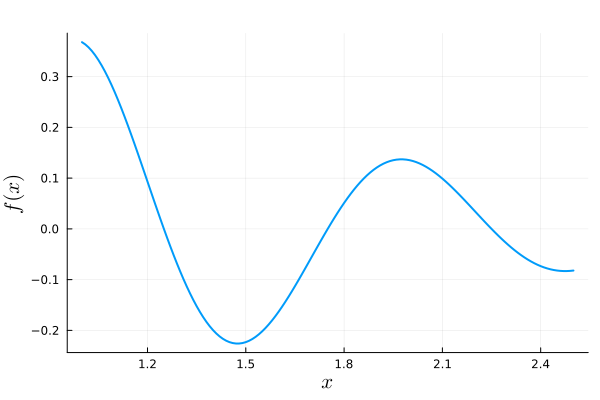

'latex' is not recognized as an internal or external command,
operable program or batch file.
'latex' is not recognized as an internal or external command,
operable program or batch file.
'latex' is not recognized as an internal or external command,
operable program or batch file.
'latex' is not recognized as an internal or external command,
operable program or batch file.
'latex' is not recognized as an internal or external command,
operable program or batch file.
'latex' is not recognized as an internal or external command,
operable program or batch file.
'latex' is not recognized as an internal or external command,
operable program or batch file.
'latex' is not recognized as an internal or external command,
operable program or batch file.
'latex' is not recognized as an internal or external command,
operable program or batch file.
'latex' is not recognized as an internal or external command,
operable program or batch file.
'latex' is not recognized as an internal or external command

In [3]:
x_actual = collect(1:0.01:2.5);
y_actual = cos.(2π * x_actual) .* exp.(-x_actual);
plot(x_actual, y_actual, title=L"$f(x) = e^{-x}cos(2\pi x)$", legend=false)
xlabel!(L"x")
ylabel!(L"f(x)")

**In the cell below**



1. the vector `x_measured` will be used when building your regressor matrix, which we often called \Phi in the textbook and notes.
2. the vector `y_measured` was often called Y in the textbook and notes.


Each of the yellow dots is a measurement that we will 
    use for building an approximation of the function f(x) 


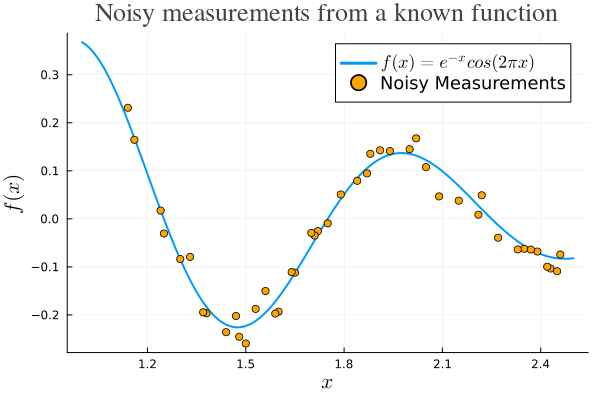

In [4]:
# Randomly sample N points along the x-axis
N = 50

# Allows us to get the same random numbers every time we run this cell
Random.seed!(12345678)

#= 
idx - random indices 
We use unique() because after flooring the numbers 
(rounding numbers to the nearest integer less than or equal to the number), 
we may have repeated indices
=#
idx = Int.(unique(floor.(rand(N) * length(x_actual))) .+ 1) 
N   = length(idx);

# Training input
x_measured = x_actual[idx]; 

# Noise from a scaled normal distribution
y_measured = y_actual[idx] + 0.02 * randn(N)

println("Each of the yellow dots is a measurement that we will 
    use for building an approximation of the function f(x) ")

plot(x_actual, y_actual, title="Noisy measurements from a known function",
    label=L"$f(x) = e^{-x}cos(2\pi x)$", xlabel=L"$x$", ylabel=L"$f(x)$")
scatter!(
    x_measured, 
    y_measured, 
    c=:orange, # set the color
    label="Noisy Measurements", 
    legend=:best) # automatically use best location to place legend in graph


Now imagine that we were given the indicated noisy measurements (yellow dots) and we would like to fit a function to them. In this toy example, we know what the function is but in practice, all we know are the measured values! How can we go about finding a function that explains the data?



Let's start with trying to use a basis often used in the textbook, namely monomials (powers of x). Remember that the basis functions can be nonlinear. It is only the way that we combine the functions together that needs to be linear (a linear combination).



**Your objective:**



Find a set of coefficients a\_1, a\_2, a\_3, a\_4 such that for every measured point x\_i, our model produces a prediction or output as close to the actual y\_i value as possible. The error between our model prediction and our actual value is e\_i = y\_i - \hat{y}\_i.



\hat{y} = a\_1 + a\_2 x + a\_3 x^2 + a\_4 x^3



We refer to our coefficients collectively as a\_{star} = [a\_1, a\_2, a\_3, a\_4]. As we will see in the next couple of cells, the use of monomials as basis functions will not be a great design choice here. However, we use them for the purpose of illustrating the added value of radial basis functions.



### **Task 1a: Construct a Regressor Matrix**



With the model described above, we can form a set of linear equations where each equation is formed by evaluating the x\_i value of our measurement to obtain a predicted \hat{y}\_i value.



\hat{y}\_1 = a\_1 + a\_2x\_1 + a\_3x\_1^2 + a\_4x\_1^3



\hat{y}\_2 = a\_1 + a\_2x\_2 + a\_3x\_2^2 + a\_4x\_2^3



\vdots



\hat{y}\_k = a\_1 + a\_2x\_k + a\_3x\_k^2 + a\_4x\_k^3



\vdots



\hat{y}\_N = a\_1 + a\_2x\_N + a\_3x\_N^2 + a\_4x\_N^3



With our linear equations written out, we can now write the set of linear equations succinctly as \hat{Y} = \Phi a.



Compose the code necessary to construct the regressor matrix \Phi for our assumed model, name it `Phi`. You will build `Phi` row-by-row which requires a single for loop. The monomial basis is \begin{bmatrix} 1 & x & x² & x³ \end{bmatrix}.



**Hint:** Since our model has 4 coefficients, the size of \Phi will be N \times 4 where `N` is the number of measurements we have taken. `Phi` should have `N` rows.



In [5]:
# Note the size of x_measured
N = length(x_measured)

44

In [6]:
Phi = zeros(N,4)
for i =1:N
  Phi[i,:] = [1 x_measured[i] x_measured[i]^2 x_measured[i]^3]
end
Phi_example=[ones(N,1) x_measured x_measured.^2 x_measured.^3]
show(stdout, "text/plain", Phi_example)
println()
is_it_correct_check1 = (norm(Phi-Phi_example) < 1e-6) ? "Yes" : "No" 

@show is_it_correct_check1;

44×4 Matrix{Float64}:
 1.0  2.43  5.9049  14.3489
 1.0  2.09  4.3681   9.12933
 1.0  1.44  2.0736   2.98598
 1.0  2.35  5.5225  12.9779
 1.0  1.88  3.5344   6.64467
 1.0  1.72  2.9584   5.08845
 1.0  1.38  1.9044   2.62807
 1.0  1.71  2.9241   5.00021
 1.0  2.22  4.9284  10.941
 1.0  1.75  3.0625   5.35938
 1.0  2.21  4.8841  10.7939
 1.0  1.91  3.6481   6.96787
 1.0  1.7   2.89     4.913
 1.0  2.39  5.7121  13.6519
 1.0  1.47  2.1609   3.17652
 1.0  2.0   4.0      8.0
 1.0  2.15  4.6225   9.93837
 1.0  1.16  1.3456   1.5609
 1.0  1.84  3.3856   6.2295
 1.0  1.3   1.69     2.197
 1.0  2.27  5.1529  11.6971
 1.0  1.48  2.1904   3.24179
 1.0  2.37  5.6169  13.3121
 1.0  2.42  5.8564  14.1725
 1.0  1.5   2.25     3.375
 1.0  1.37  1.8769   2.57135
 1.0  1.65  2.7225   4.49212
 1.0  2.02  4.0804   8.24241
 1.0  1.6   2.56     4.096
 1.0  1.94  3.7636   7.30138
 1.0  1.33  1.7689   2.35264
 1.0  1.64  2.6896   4.41094
 1.0  2.33  5.4289  12.6493
 1.0  2.46  6.0516  14.8869
 1.0  1.87  3.496

**Helpful functions moving forward:**



In [7]:
#=
forwardsub(L, b)

It solves for x in an equation Lx = b, where L is lower triangular.
=#

function forwardsub(L, b)
    n = length(b)
    x = Vector{Float64}(undef, n); 
    x[1] = b[1]/L[1,1] 
    for i = 2:n 
        x[i] = (b[i]- (L[i,1:i-1])'*x[1:i-1] )/L[i,i] 
    end
    return x
end

#=
backwardsub(U, b)

It solves for x in an equation Ux = b, where U is upper triangular.
=#

function backwardsub(U, b)

    if minimum(abs.(diag(U))) < 1e-6
        println(" U is nearly singular. ")
        return x = NaN
    end
    
    n = length(b)
    x = Vector{Float64}(undef, n)
    x[n] = b[n] / U[n,n]
    for i = n-1:-1:1
        x[i] = (b[i] - (U[i,(i+1):n])' * x[(i+1):n]) / U[i,i]
    end
    
    return x    
end

backwardsub (generic function with 1 method)

### **Task 1b: Least Squares LU Pipeline**



Build a function that uses the LU pipeline to solve a regression problem for \Phi \alpha^\ast = Y. You can assume the columns of \Phi are linearly independent. You must assume that you are carrying out LU-factorization with permutations. We emphasize that you are solving for \alpha^\ast := \underset{\alpha}{\rm arg~min} ||Y-\Phi \alpha ||^2, so your function should return `alphaStar`.



You must use the function header in the static cell below.



In [ ]:
# Phi::Array{Float64,2} simply checks that the input is a real matrix
# Y::Array{Float64,1} simply checks that the input is a real vector 

function least\_squares\_lu(Phi::Array{Float64,2}, Y::Array{Float64,1})

In [8]:
# Phi::Array{Float64,2} simply checks that the input is a real matrix
# Y::Array{Float64,1} simply checks that the input is a real vector 

function least_squares_lu(Phi::Array{Float64,2},  Y::Array{Float64,1})
  sqrPhi = Phi' * Phi;
  F = lu(sqrPhi);
  temp = forwardsub(F.L,F.P*(Phi'*Y));
  alphastar = backwardsub(F.U,temp)
  return alphastar
end

PhiTest = [ 1 1.0; 1 2; 1 4; 1 5]
YTest = [2; 3.2; 4.7; 6]
alphaStarTest=least_squares_lu(PhiTest,YTest)
show(stdout, "text/plain", alphaStarTest)
println("\n")

is_it_correct_check1 = (norm(alphaStarTest- [1.125000000000001;  0.9499999999999996]) < 1e-4) ? "Yes" : "No" 

@show is_it_correct_check1;

2-element Vector{Float64}:
 1.1249999999999976
 0.9500000000000007

is_it_correct_check1 = "Yes"


In the next cell, we next use your function `least_squares_lu` to solve for `a_star`



In [9]:
# Calling the function and returning a_star
a_star = least_squares_lu(Phi,y_measured)

# Let's see the cofficients for our monomial fit model 
@show a1 = a_star[1];
@show a2 = a_star[2];
@show a3 = a_star[3];
@show a4 = a_star[4];
println("This is a_star!")
a_monomial = copy(a_star)

a1 = a_star[1] = 11.914460345663601
a2 = a_star[2] = -21.29385582440765
a3 = a_star[3] = 12.222600209006371
a4 = a_star[4] = -2.2639072928600648
This is a_star!


4-element Vector{Float64}:
  11.914460345663601
 -21.29385582440765
  12.222600209006371
  -2.2639072928600648

### **Task 1c: Build **\hat{y}****



Let's now use your regressed coefficients `a_star` to build a scalar-valued (i.e., not a vector) function based on the monomials, 1, x, x^2, x^3. If you need a reminder of what \hat{y} looks like, read the description in 1a.



Reminder: You are fitting a function to data. Hence, the result of your regression work with monomials is a polynomial approximation to our data set.



You must use the function header and return variable in the static cell below



In [ ]:
#= 
x is a scalar value (real number)
a is a vector of parameters for the polynomial (a\_star)
yHat is the polynomial approximation to the data at the point x
=#
function yHatMonomials(x,a=a_star)
 # YOUR CODE HERE 
 return yHat
end

In [12]:
# YOUR ANSWER HERE
function yHatMonomials(x,a=a_star)
  # YOUR CODE HERE 
  yHat = a[1] + a[2] * x + a[3] * x^2 + a[4] * x^3
  return yHat
 end


# This is the only test for this problem (no hidden tests)
is_it_correct_check1 = ((yHatMonomials(-1) - 47.694823671937684) < 1e-5) ? "Yes" : "No" 
is_it_correct_check2 = ((yHatMonomials(2) - 0.1058911899932653) < 1e-5) ? "Yes" : "No" 
is_it_correct_check3 = (norm(yHatMonomials.([1; 2]) -[0.579297437402257; 0.1058911899932653]) < 1e-5) ? "Yes" : "No" 

@show is_it_correct_check1;
@show is_it_correct_check2;
@show is_it_correct_check3;

check = 0

if is_it_correct_check1 == "Yes" && is_it_correct_check2 == "Yes" && is_it_correct_check3 == "Yes"
  check = 1
end

@show @assert check == 1

is_it_correct_check1 = "Yes"
is_it_correct_check2 = "Yes"
is_it_correct_check3 = "Yes"
#= d:\CODING\Julia\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y100sZmlsZQ==.jl:24 =# @assert(check == 1) = nothing


Finally, now that we have our weights for the monomial basis elements, let's check the quality of our fit. A way to quantify how well our model fits the data is to calculate the total squared fitting error. We will calculate our error by comparing how well our model predicts the values we MEASURED and not the TRUE VALUES from the original function (remember, we wouldn't know the actual function in practice).



We define the fitting error E\_{tot} below where y\_i is the true value obtained from our known function at x\_i and \hat{y}\_i is the output of our model after evaluating it at x\_i



E\_{tot} = \sum\_{i=1}^{N}(e\_i)^2 = e^\intercal e = (\hat{y} - y)^\intercal(\hat{y} - y) = ||\hat{y} - y||^2\_2



The monomial fitting error  0.16917367148524912  is not very good. We will work to fix this.
The blue line is our polynomial fit while the orange dots are the data.


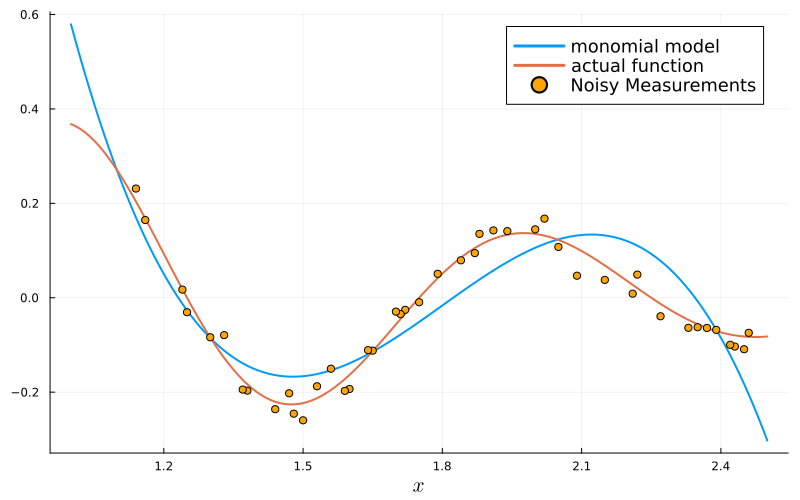

In [13]:
#= 
I create a function that helps to calculate 
the fitting error of our monomial model

-------------
error_monomial_fit(a, X)

Calculates and returns the error E_tot defined as:

            E_tot = Σ(yhat_i - y_i)^2

between the monomial model and the actual function
-------------
This function accepts X as a column vector
=#
function error_monomial_fit(X, a=a_star, y=y_measured)
    # Default values are provided for the coefficients a and mesurements y
    @assert size(a,1) == 4
    
    # Calculate the value of the model: y_hat = a₁ + a₂x + a₃x^2 + a₄x^3
    # We vectorize the computations
    y_hat = a[1] .+ a[2]*X + a[3]*X.^2 + a[4]*X.^3

    # Return the total squared error E_tot
    return (y - y_hat)' * (y - y_hat)
end


#=
We illustrate here how to generate a plot of 
the estimated function and report the fitting error.

We use the same x points we used for drawing our original 
function to draw our regressed function
=#

#the . after yHatMonomials applies the function to each component of x_actual
y_hat = yHatMonomials.(x_actual)

# Calculate and display the fitting error
etot = error_monomial_fit(x_measured)
println("The monomial fitting error  $etot  is not very good. We will work to fix this.")
println("The blue line is our polynomial fit while the orange dots are the data.")

plot(x_actual, y_hat, label="monomial model", xlabel=L"$x$")
plot!(x_actual, y_actual, label="actual function")
scatter!(x_measured, y_measured, c=:orange, label="Noisy Measurements", 
    legend=:best, size=(800,500))

While the general shape is roughly captured, the crests in the plot do not match well. We can see that if we were to extend the x-axis in either direction, then the two curves would diverge significantly.



The source of the problem is the use of the monomials. As powers of x, they blow up as x gets large. The monomial basis often turns out to be quite inconvenient when doing regression problems.



Let's plot the monomial functions individually and get a feel for them. **As you move through the project, the goal will be to arrive at a model that will produce a lower fitting error than the one above based on monomials.**



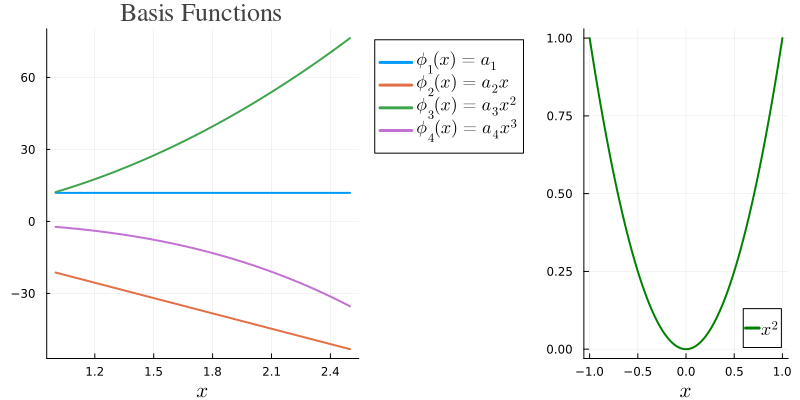

In [14]:

# I create two plots. The first plot shows a line for each of the 4 monomials 
# in our model. The second plot shows a picture of x^2 to use as a reference.

l = @layout [a{0.7w} b{0.3w}]
p1 = plot(x_actual, a1*ones(length(x_actual)), label=L"$\phi_1(x) = a_1$")
plot!(p1, x_actual, a2*x_actual, label=L"$\phi_2(x) = a_2 x$")
plot!(p1, x_actual, a3*x_actual.^2, label=L"$\phi_3(x) = a_3 x^2$")
plot!(p1, x_actual, a4*x_actual.^3, label=L"$\phi_4(x) = a_4 x^3$",
    legend=:outertopright)
xlabel!(L"$x$")
title!("Basis Functions")

x_sq = collect(-1:0.01:1)
p2 = plot(x_sq, x_sq.^2, label=L"x^2",color=:green)
xlabel!(L"$x$")
plot(p1, p2, layout=l, size=(800,400))

What are some things you might notice about each of the individual monomials you've plotted? If someone asked you to describe the shape of the x² you might say that it is bowl shaped, as shown to the right. However, in the image to the left, we see only a portion of a really big bowl. One of the issues of using the monomial basis functions is that if we take x² for example, regression tries to fit it to all the measurements. What if we could have it fit only the measurements near the bowl shape at 𝑥=1.5 in the original (actual) function. **Said another way, what if we could locally fit the basis functions to individual sections of the data?**





---



### **The Radial Basis Function**



f(x; x\_c, s) = exp(\frac{-|x-x\_c|^2}{2s^2})



The equation above is the formula for a generic Radial Basis Function (RBF). x and x\_c are vectors in \mathbb{R}^n and s is a positive scalar. Both x\_c and s are known before evaluating the function and are said to parameterize the function. Just as y=2x and y=-3x are both equations for lines, the value of the slope changes the steepness of the line. We will find that our radial basis function always has a bell-shaped curve that changes its look based on the values of x\_c and s. In particular, x\_c determines the **center** of the function and s determines its **width**.



Try out different values for x1, xc, and s. The cell following will display the RBF function with the given parameters.



In [ ]:
# This static cell demonstrates what is expected
# Use values within the range mentioned here

x1 = 0 # Try values between [-5, 5]
xc = 0 # Try values between [-5, 5]
s = 1 # Try values between [0.1, 2]

In [29]:
# YOUR ANSWER HERE
x1 = -5 # Try values between [-5, 5]
xc = -5 # Try values between [-5, 5]
s = 1 # Try values between [0.1, 2]

1

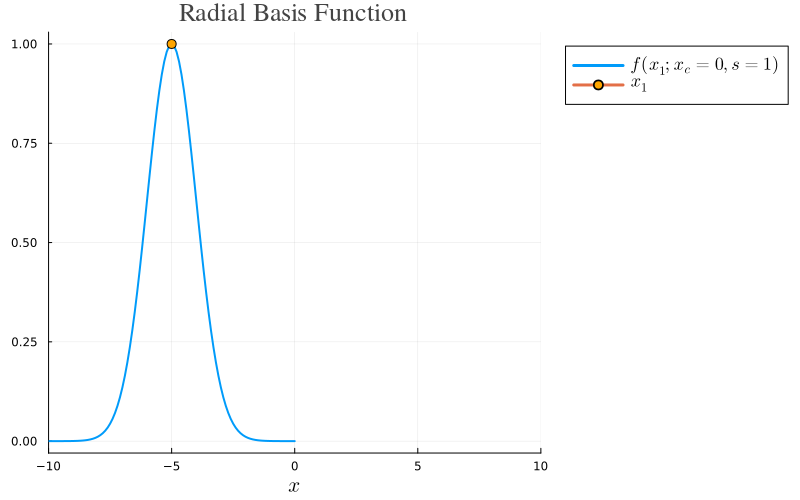

In [30]:
# rbf(x) assumes x, xc and s are all scalars (real numbers)
rbf(x, xc, s) = exp(-(x-xc)^2 / (2*s^2))

#= The radial basis function, vectorized!
For x a column vector, xc a scalar, and s a scalar, the function
rbfVectorized() returns a column vector of the same size as x
We will use it in some of our plots
=#
rbfVectorized(x, xc, s) = exp.(-(x.-xc).^2 / (2*s^2))

x = collect(-5:0.1:5) .+ xc
y = rbfVectorized(x, xc, s) 
    
plot(x, y, xlabel=L"$x$", label="\$f(x_1;x_c=0,s=$s)\$",
    title="Radial Basis Function", xlims=(-10,10))
plot!([x1], [rbfVectorized(x1, xc, s)], marker=:orange, markersize=5, 
    label=L"$x_1$", legend=:outertopright, size=(800,500))

Take a few minutes to understand how changing each input to the function affects its graph. As you play around with the inputs you should notice the following:



* x: as x gets further and further in either direction away from x\_c, the value of the function becomes smaller. It is the largest when x is exactly x\_c. This makes sense because when we look at the numerator in the exponent of our RBF, |x-x\_c|^2 just represents the norm (distance) between two vectors. However, because we are negating the power in the function (\exp(-...)), large norms lead to small output values.
* x\_c: changes where the peak of the bell curve lies. We can think of this as the function's center.
* s: changes how narrow or wide our function is




---



### Task 2: Using Radial Basis Functions (RBFs)



In the last set of cells, we looked at how the inputs of the RBF change the shape of the function. In this task, we explore trying to fit our original real-valued function f(x) = e^{-x}cos(2\pi x) with two RBFs and a constant. We can write our model as follows:



\hat{y} = a\_0 + a\_1 f(x; x\_{c\_1}, s) + a\_2 f(x; x\_{c\_2}, s)



Note that in this formulation, the width parameter s is shared between both RBFs. Typically when using RBFs, there will be one width parameter shared among all of the basis functions. For the rest of this project, we will do so as well. In the next two cells, we provide two helper functions to plot our model and calculate the fitting error with our two-RBF model.



In [31]:
#= 
I will create a function
that will plot our 2 RBF models along with our
original function using the parameters provided
=#

function plot_2rbf_model(f)    
    # Calculate the value of the model: y_hat = a₁f(x; xc1, s) + a₂f(x; xc2, s)
    # at each data point val in x_actual and arrange it as a vector
     y_hat = f(x_actual)    
     plot(x_actual, y_actual, title="Partial Data Fit", line=:dash,
        label=L"$f(x) = e^{-x}cos(2\pi x)$", xlabel=L"$x$", ylabel=L"$f(x)$", c=:orange)
    plot!(x_actual, y_hat, label="\$$a0 + $a1 f(x_1;x_c=$xc1,s=$s) + $a2 f(x;x_c=$xc2,s=$s)\$", c=:blue)
    scatter!(x_measured, y_measured, c=:orange, label="Noisy Measurements", 
        legend=:best, size=(800,500)) 
end

#= 
I will create a function
that will calculate the total error between our
model predicted values and the actual measurements
--------
error_2rbf_fit(a1, xc1, a2, xc2, s, x)

Calculates and returns the error E_tot defined as:

            E_tot = Σ(yhat_i - y_i)^2

when x is a vector
=#

function error_2rbf_fit(a0, a1, xc1, a2, xc2, s, x)
    
    # Calculate the value of the model: y_hat = a₁f(x; xc1, s) + a₂f(x; xc2, s)
    # at each data point val in x and arrange it as a vector
    y_hat = [a0 + a1 * rbf(xval, xc1, s) + a2 * rbf(xval, xc2, s) for xval in x]
    # the "for xval in x" creates y_hat as a column vector (N x 1 matrix)
    # where N = length(x). 
    return (y_measured - y_hat)' * (y_measured - y_hat)
end

error_2rbf_fit (generic function with 1 method)

### **Task 2a: Fitting By Hand on RBFs**



For this task, you will tune by hand 5 parameters to minimize the fitting error E\_{tot} of our model. The parameters `a_1` and `a_2` are the coefficients of our model, `xc1` and `xc2` are the centers of our RBFs and `s` is the shared width parameter. The constant term/bias is set to `a_0 = 0.05`.



We are only using two RBFs and are tuning the parameters by hand so our modest goal is to identify a parameter set that produces a total error that is less that 0.5.



To start off, it is suggested to fit one RBF at a time. Set the coefficient `a_2` to 0 and adjust the parameters `a_1,` `xc1`, `s` to approximately fit one of the two humps in the function. Once that's done, begin to modify `a_2` and `xc2`. As you start fitting the second RBF, you may want to revisit some of your values for `s`, `a_1`, and `xc2`.



In [32]:
# This static cell demonstrates what is expected
# Use values within the range mentioned here

a1 = 1 # Try values in between [-1, 1] 
xc1 = 1.75 # Try values in between [1, 2.5]
s = 0.15 # Try values in between [0, 0.3]
xc2 = 1.75 # Try values in between [1, 2.5]
a2 = 0 # Try values in between [-1, 1]
a0 = 0.05 # Don't change this value. We already tuned it for you!

#=
After each change of the numbers, run the cell
that displays your errors and plots the function
to see how you did and if you need to 
tune some more! 
=#

0.05

In [65]:
# YOUR ANSWER HERE
a1 = -0.27 # Try values in between [-1, 1] 
xc1 = 1.48 # Try values in between [1, 2.5]
s = 0.17 # Try values in between [0, 0.3]
xc2 = 2 # Try values in between [1, 2.5]
a2 = 0.13 # Try values in between [-1, 1]
a0 = 0.05 # Don't change this value. We already tuned it for you!

0.05

Monomial Fitting Error: 0.16917367148524912
2 RBF Fitting Error   : 0.31166953665823516
 
Good enough! You pass the test! It is not worth achieving a lower error by hand.


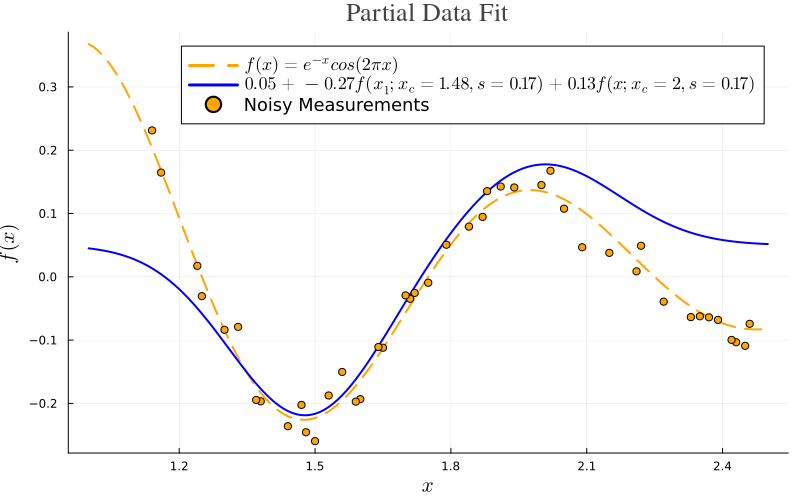

In [66]:
# Display error
etot_2rbf = error_2rbf_fit(a0, a1, xc1, a2, xc2, s, x_measured)
etot_monomials = error_monomial_fit(x_measured,a_monomial)
println("Monomial Fitting Error: ", etot_monomials)
println("2 RBF Fitting Error   : ", etot_2rbf)
println(" ")
if etot_2rbf < 0.5
    println("Good enough! You pass the test! It is not worth achieving a lower error by hand.")
else
    println("Keep trying. Be systematic on how you go about adjusting the values a1 xc1 s a2 xc2")
end

# Plot model
y_rbf(x) = [a0 .+ a1 * rbfVectorized(x, xc1, s) .+ a2 * rbfVectorized(x, xc2, s)]
plot_2rbf_model(y_rbf)

Congratulations! You have just fit using RBFs and we hope you can see that with just two bases that we are already getting a significantly better fit in the middle portion of the x-axis.



At the moment, with just two basis functions, the total fitting error is still many times larger due to the deviation at the tails, but as we add more basis functions we can begin to get a closer fit at the ends of the function as well. A lot of the magic of the fit comes from the fact that values evaluated far away from the center of a RBF are very close to 0. This makes RBFs very nice to use in our linear model.



However, you still may have needed to have gone back and adjusted the parameters of the first RBF once you started adjusting the parameters of the second. Now that we have an understanding of the benefits of using RBFs for fitting, let's see if we can use our least squares pipeline to find a model and a set of coefficients that has a lower fitting error than our monomial model.



### **Task 2b: Fitting using Least Squares and RBFs - Setting up Least Squares**



To start using more RBFs in our model, let's first expand our model and also add back the constant term. M represents the number of RBFs we decide to use in our model.



\hat{y} = a\_1 + a\_2 f(x; x\_{c\_1}, s) + a\_3 f(x; x\_{c\_2}, s) + ... + a\_{M+1} f(x; x\_{c\_M}, s)



Looking back up top to the least squares LU factorization pipeline, the first step we need to do is construct the regressor matrix, \Phi. When using the monomials, \Phi looked like so:



\underbrace{ \begin{bmatrix} \hat{y}1 \\ \hat{y}2 \\ \vdots \\ \hat{y}N \end{bmatrix}}\_{\hat{Y}} = \underbrace{ \begin{bmatrix} 1 & x\_1 & x\_1^2 & x\_1^3 \\ 1 & x\_2 & x\_2^2 & x\_2^3 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x\_N & x\_N^2 & x\_N^3 \end{bmatrix}}\_{\Phi} \underbrace{ \begin{bmatrix} a\_1 \\ a\_2 \\ a\_3 \\ a\_4 \end{bmatrix}}\_{\alpha}



With our RBFs, a single row in our \Phi matrix can now be determined by following the below construction of a row where x\_i is the i-th measurement out of N total measurements, s is the shared RBF width parameter (also sometimes referred to by the name kernel width) and x\_{c\_1} through x\_{c\_m} are M different basis centers. The next few cells provide some useful helper functions that we will use in our pipeline.



\begin{bmatrix} 1 & f(x\_i;x\_{c\_1},s) & f(x\_i;x\_{c\_2},s) & ... & f(x\_i;x\_{c\_M},s) \ \end{bmatrix}



In [67]:
# I will create a function THAT
# will be helpful in assembling our Φ matrix assuming
# our model is a linear combination of RBFs

#=
function calc_phi_row(x, centers, s)

Returns a single row in the regressor matrix, Φ 

Inputs:
    xᵢ      - the value of the i-th measurment x
    centers - an Mx1 vector holding the centers of the determined RBFs
    s       - the shared kernel width (RBF width)
=#

function calc_phi_row(xᵢ, centers, s)
    # xᵢ is a scalar
    # centers is a vector of centers for the rbf basis elements
    # s is the scale value
    NumBasisElements = length(centers) + 1
    # plus one above because we also include a constant
    phi_row = zeros(1,NumBasisElements)
    phi_row[1] = 1    
    for i = 2:NumBasisElements
        phi_row[i] = rbf(xᵢ, centers[i-1], s)
    end    
    return phi_row
end

calc_phi_row (generic function with 1 method)

Build the regressor matrix row-by-row using the function `calc_phi_row(xᵢ, centers, s)` and a single (not nested) for loop. A skeleton is provided for you.



In [ ]:
# Create a function that returns the regressor matrix Φ 
# based on our model using RBFs as basis functions

#=
function regressor\_matrix()

Returns the regressor matrix Φ

Inputs:
 X - a Nx1 vector holding the X value of all the measurements
 centers - a Mx1 vector holding the centers of the determined RBFs
 s - the shared kernel width (RBF width)
=#

function regressor_matrix(X, centers, s)
 # X is a vector of points in R
 # centers is a vector of centers for the rbf basis elements
 # s is the scale value 
 N = length(X)
 M = length(centers)
 Phi = Array{Float64, 2}(undef, N, M+1)
 
 ### YOUR FOR LOOP HERE ###
 
 return Phi
end

In [70]:
# YOUR ANSWER HERE
function regressor_matrix(X, centers, s)
    # X is a vector of points in R
    # centers is a vector of centers for the rbf basis elements
    # s is the scale value 
    N = length(X)
    M = length(centers)
    Phi = Array{Float64, 2}(undef, N, M+1)
    
    ### YOUR FOR LOOP HERE ###
    for i = 1:N
        Phi[i,:] = calc_phi_row(X[i], centers, s)
    end
    return Phi
end

# You should have a 44 x 4 matrix.
PhiTestRow=regressor_matrix(x_measured, [1;2;3], 0.15)
show(stdout, "text/plain", PhiTestRow)
println()
@show size(PhiTestRow)

PhiTestRow=regressor_matrix(x_measured, [1;2;3], 0.15)[3,:]

is_it_correct_check1 = ( norm(PhiTestRow - [1.0, 0.013538440136652369, 0.0009406975448679014, 3.261027180711029e-24] ) < 1e-5) ? "Yes" : "No" 

@show is_it_correct_check1;
@show @assert is_it_correct_check1 == "Yes"

44×4 Matrix{Float64}:
 1.0  1.83947e-20  0.016426     0.000731802
 1.0  3.41712e-12  0.83527      1.01863e-8
 1.0  0.0135384    0.000940698  3.26103e-24
 1.0  2.57676e-18  0.0657285    8.36483e-5
 1.0  3.3595e-8    0.726149     7.83069e-13
 1.0  9.9295e-6    0.175131     1.54106e-16
 1.0  0.0404015    0.000195056  4.69835e-26
 1.0  1.36438e-5   0.154295     8.70543e-17
 1.0  4.31985e-15  0.341108     1.34381e-6
 1.0  3.72665e-6   0.249352     8.32397e-16
 1.0  7.41289e-15  0.375311     9.48021e-7
 1.0  1.01863e-8   0.83527      3.41712e-12
 1.0  1.86645e-5   0.135335     4.89587e-17
 1.0  2.25593e-19  0.0340475    0.00025637
 1.0  0.00738068   0.00194553   2.55859e-23
 1.0  2.23363e-10  1.0          2.23363e-10
 1.0  1.72412e-13  0.606531     1.06454e-7
 1.0  0.566154     1.54975e-7   2.11648e-33
 1.0  1.54975e-7   0.566154     1.03188e-13
 1.0  0.135335     1.86645e-5   1.28423e-28
 1.0  2.71594e-16  0.197899     7.19429e-6
 1.0  0.00597602   0.00245682   5.03914e-23
 1.0  7.69236e-19

### **Task 2c: Fitting using Least Squares and RBFs - Fitting**



Now that we have some helper functions, let's see how well we can fit our samples using radial basis functions and the least squares pipeline to calculate the optimal coefficients for our model. **The goal of this task is to produce a fitting error that is less than the error we had with our monomial model.**



In this task, you will play around with one parameter, namely `M`, which you can set in the next cell. `M` represents the number of radial basis functions in our model. We give you a good `s` value since it may be difficult to tune. Do not change it. `s` represents the width each RBF will use.



We use `M` to select our basis centers and display them in a plot. The centers should be selected in the domain (x range) of the data, so we randomly select some of the measured x values to use as our centers. As we saw when we just used 2 RBFs, we need to place enough RBFs to sufficiently cover the domain of the data (so our model fits the tails of the function just as well as the middle of it). One way to achieve this is to randomly select values from the data to use as basis centers. Since `x_measured` is not sorted, when we select indices below, the centers will seem to appear at random.



In [ ]:
s = 0.25 # Do not change this value

M = 2 #This value you should change! 2 is too small and 10 may be too big!

#=
The point value below is 0
but it is still very important
to have a good M.
The point value is included in Task 2.
=#

In [73]:
# YOUR ANSWER HERE
s = 0.25 # Do not change this value

M = 5 #This value you should change! 2 is too small and 10 may be too big!

5

 
When we do the regression, the CENTERS are taken as the randomly selected blue dots at x = [1.33, 1.65, 1.14, 1.56, 2.45]


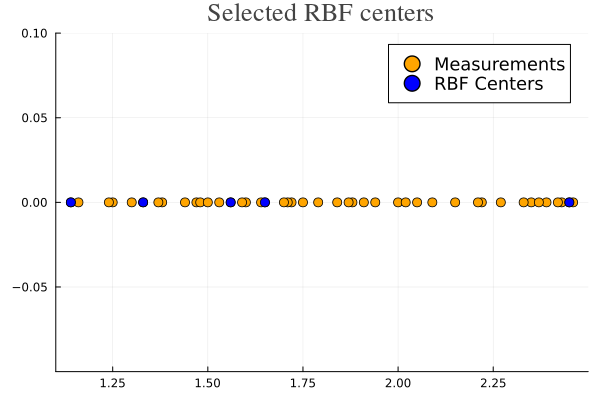

In [74]:
#= 
If we have N measurements, 
select M of them evenly spaced by index from 1 to N
Note that because the measurements are not sorted as you change M, they
will appear to be selected at random from x_measured
=#
Random.seed!(9876543210)
center_indices = collect(1:N); center_indices = shuffle(center_indices)[1:M]
#center_indices = Int.(floor.(collect(range(1, N, length=M))))

# Creating a vector like this is known as using list comprehension
# Read it as - for every element i in center_indices get the ith value in x_measured
centers = [x_measured[i] for i in center_indices]
println(" ")
println("When we do the regression, the CENTERS are taken as the randomly selected blue dots at x = ", centers)

# Visually see selected RBF centers
scatter(x_measured, zeros(N,1), markersize=5, c=:orange, label="Measurements", title="Selected RBF centers")
scatter!(centers, zeros(M,1), markersize=5, c=:blue, label="RBF Centers", legend=:best)
ylims!((-0.1,0.1))

**Note:** Some combinations of `M` and `s` result in a U matrix in the `backwardsub` function whose columns are not linearly independent. In this case, you will be met with an assertion error that checks if any of the diagonal elements are close to 0: minimum(abs.(diag(U))) > 1.0e-6.



This happens when some basis centers are really close to one another, or the value of `s` is too large. Consider changing the value of `M` to obtain a different set of centers.



### **Task 2d: Use the LU-based least squares pipeline (from Task 1) to fit your selected number of RBF functions to** `y_measured`**. Name the result** `a_star`**.**



In [75]:
#Run this first
println(" If you see NaN in your a_star, then your value for M is probably too large. Go back and tune its value.")
Phi = regressor_matrix(x_measured, centers, s)

 If you see NaN in your a_star, then your value for M is probably too large. Go back and tune its value.


44×6 Matrix{Float64}:
 1.0  6.25215e-5   0.00769488  1.6532e-6    0.00234563  0.996805
 1.0  0.00984492   0.212503    0.000731802  0.105695    0.354588
 1.0  0.907738     0.702718    0.486752     0.891188    0.000285634
 1.0  0.000242818  0.0198411   8.18833e-6   0.00678664  0.923116
 1.0  0.0889216    0.654948    0.0125153    0.440784    0.074333
 1.0  0.296176     0.961558    0.0677995    0.81481     0.0140772
 1.0  0.980199     0.55811     0.630779     0.771669    0.000105247
 1.0  0.314995     0.971611    0.074333     0.83527     0.0125153
 1.0  0.00176996   0.074333    8.86158e-5   0.0306599   0.654948
 1.0  0.24385      0.923116    0.0509556    0.749162    0.0198411
 ⋮                                                      ⋮
 1.0  0.582282     0.971611    0.197899     0.992826    0.00269381
 1.0  4.38297e-5   0.00597602  1.09058e-6   0.00176996  1.0
 1.0  0.749162     0.12483     1.0          0.24385     1.09058e-6
 1.0  0.0158086    0.278037    0.00132705   0.14649     0.278037
 1

In [76]:
# YOUR ANSWER HERE
a_star = least_squares_lu(Phi,y_measured)

6-element Vector{Float64}:
  0.2076531197941895
 -0.5545826652109261
  0.17095309220049434
  0.46858472772839027
 -0.31588431272582795
 -0.3012531882732998

In [77]:
#=  
This cell does the following:

(a) build a function to evaluate your regressed 
function at an arbitray value of x. 
You will need to do this in part 2 of the project, so pay attention

(b) evaluate it at the points x_actual and the points x_measured

(c) compute the total squared fitting error
=#


#= (a)
In the below function, note that calc_phi_row(x, centers, s)*a_star 
is a 1 x 1 matrix and thus you need to extract its entry 
(or contents), hence, the [1]. 
=#
f_hatRBF(x)=(calc_phi_row(x, centers, s)*a_star)[1] 


# (b)
### Evalue at the points x_actual

#create a variable of the correct size
y_hatRBF=zero(x_actual) 

for i in 1:length(x_actual)
   y_hatRBF[i] = f_hatRBF(x_actual[i])
end

### Evalue at the points x_measured

# create a variable of the correct size
y_estRBF=zero(x_measured) 

for i in 1:length(x_measured)
   y_estRBF[i] = f_hatRBF(x_measured[i])
end

# (c)
etot_rbf =  (y_measured - y_estRBF)' * (y_measured - y_estRBF)
@show etot_rbf


etot_rbf = 0.02211202544689015


0.02211202544689015

In [78]:
#=
I compare the monomial
fitting error with the error of our new RBF model
=#

# Calculate and display the fitting error
etot_monomial = error_monomial_fit(x_measured, a_monomial)

println(" ")
println("Belts and supsenders: We check your work one more time!")
println("Monomial Fitting Error: ", etot_monomial)
println("RBF Fitting Error     : ", etot_rbf)

if etot_rbf < 0.1
    println("Yes, this looks good enough. No need to check with us.")
else
    println("No, the fit is inadequate. Please go back and re-tune M, the number of RBF basis elements,")
    println("until you achieve etot_rbf < 0.1 Don't worry, it should be quick.")
end

 
Belts and supsenders: We check your work one more time!
Monomial Fitting Error: 0.16917367148524912
RBF Fitting Error     : 0.02211202544689015
Yes, this looks good enough. No need to check with us.


If necessary, go back and adjust your value for `M`, the number of RBF basis elements, until `etot_rbf < 0.1`. You still want `2 < M < 10`. You may also need to verify that `a_star` is correct.



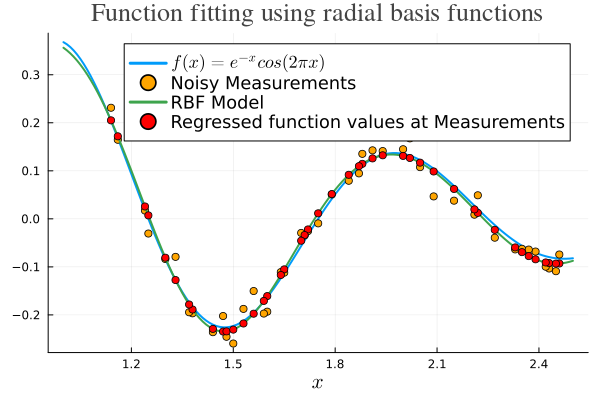

In [79]:
# Plot the results
plot(x_actual, y_actual, label=L"$f(x) = e^{-x}cos(2\pi x)$", xlabel=L"$x$",)
scatter!(x_measured, y_measured, c=:orange, label="Noisy Measurements")
plot!(x_actual, y_hatRBF, label="RBF Model")
scatter!(x_measured, y_estRBF, c=:red, label="Regressed function values at Measurements", legend=:best)
title!("Function fitting using radial basis functions")



---



Reflection
----------



We have seen in this notebook that we can use radial basis functions to create a smooth fit. In Part 2, instead of taking data and fitting a line (1D), we attempt to take 2D data and fit a surface to it. Spend some time thinking about what the parameters of the radial basis function, specifically what 𝑥𝑐 and 𝑠 represent, when the problem is extended into 2D.



### If you have completed this part, check your answers, hit the submit button, and begin Part 2.

